# WASP 39 b

## Learning Goals:

This notebook will present the data for WASP 39b as observed by TESS. Data presented here will complement those derived from the JWST early release science. 

The notebook will teach the user how to do the following:

1. Search TESS for data on the WASP-39 system using *Lightkurve*.
2. Download a light curve.
3. Find the transiting planet via a box least squares periodogram analysis.
4. Obtaining a light curve from the TPF and reducing the data.

To learn more about the TESS mission in general and the various data products please visit the [TESS Science Support Center](https://heasarc.gsfc.nasa.gov/docs/tess/).

## Introduction: 
The WASP 39 system is located approximately 698 light-years from the Earth, with late G-type host star which is roughly 90% the mass and radius of our own Sun.

The system is host to WASP-39 b, a highly inflated transiting Saturn mass planet which is about 30% percent the mass of Jupiter, and 30% larger. The orbital period of the planet around the host is approximately 4 days. You can learn more about this system and its parameters via the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/overview/WASP%2039).

This planet is an interesting as it seems to have three times the amount of water vapor in its atmosphere as detected on Saturn. This object was therefore selected for follow up by JWST.


## Imports

This tutorial requires the [*Lightkurve package*](https://docs.lightkurve.org/index.html), which uses [Matplotlib](https://matplotlib.org/) for plotting. We will also use [Numpy](https://numpy.org/).

In [1]:
%matplotlib inline 
import lightkurve as lk 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## First time users: 

If you are not that experienced with Python, or cannot download Lightkurve, you can run this notebook as a Colab notebook. Colaboratory allows users to write and execute Python in your browser with zero configuration required.

All you need is a Google account and to copy and paste in the following command at the top of your colab notebook:

`!pip install lightkurve --quiet`

This downloads the Lightkurve package.

## 1. Search TESS for data on the WASP-96 system using *Lightkurve*.

Lightkurve offers a user-friendly way to analyze time series data obtained by the TESS mission. You can search for the various WASP-96 data products using the following functions:

- To the system in a full frame image: [`search_tesscut()`](https://docs.lightkurve.org/reference/api/lightkurve.search_tesscut.html?highlight=search_tesscut)
- To look for target pixel files: [`search_targetpixelfile()`](https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html?highlight=search_targetpixelfile)
- To obtain light curve files for WASP-96: [`search_lightcurve()`](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html?highlight=search_lightcurve)



### 1.1 Accessing the data products
Let’s go through each one of the above functions and see what data is available.

In [2]:
search_ffi = lk.search_tesscut('WASP39')
search_tpf = lk.search_targetpixelfile('WASP39')
search_lcf = lk.search_lightcurve('WASP39')

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 51,2022,TESScut,475,WASP39,0.0


The above table provides several important pieces of information: 

- The sector in which the object was observed. 
- The year in which the object was observed. 
- The author of the data. This can have multiple options and each is a hyperlink that when clicked will provide you with more information. 
- The cadence of the observation. 
- The name of the target. 
- The distance of the observation from your target of interest. This is useful if you conduct a cone search around your objects co-ordinates.

The table above indicates that our object was observed in sectors 51 only.

Let’s see if any other data exists, i.e., was it observed as a target of interest and does it have a Target Pixel File.

In [4]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 51,2022,SPOC,120,181949561,0.0


Our object was observed as a target of interest in Sector 51. Given that there is SPOC data this means that there should be light curve files for our object already in the archive. Let’s check those out.

In [5]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 51,2022,SPOC,120,181949561,0.0


Wonderful! A light curve for our object of interest has already been created. 

## 2. Download a light curve:
Now on to getting the light curve for our object of interest. Since there is only one light curve this is pretty straight forward.

In [6]:
lc = search_lcf[0].download(quality_bitmask='hard')

We can easliy plot these data using the following code

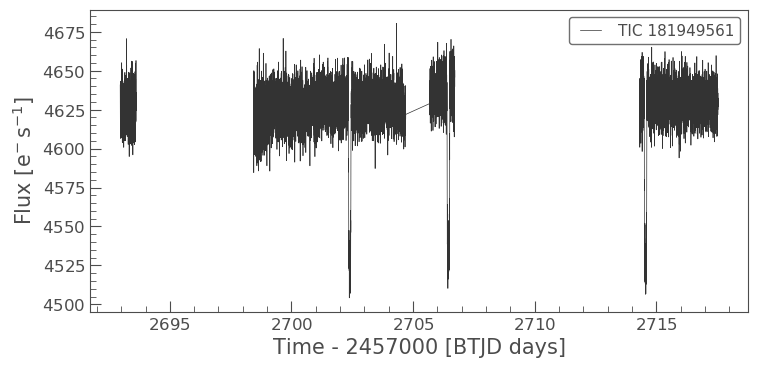

In [7]:
lc.plot()

We can clearly see the transit of our planet WASP-39 b around BTJD 2703, 2706 and 2714. 

Note that there are also several gaps in our light curve above. These are caused by standard data downloads (between 2704.69374 and 2705.67846) and an unusual increase in the background/scattered light (please see [TESS DRN 74](https://archive.stsci.edu/missions/tess/doc/tess_drn/tess_sector_51_drn74_v01.pdf) caused by the Earth and Moon. As such we have a higher number of data gaps than normal. 

When we downloaded the system data previously, we specified that only good quality data be obtained. This was done via the specification of a  [`quality_bitmask`](https://docs.lightkurve.org/reference/api/lightkurve.TessTargetPixelFile.html?highlight=quality_bitmask) parameter. 

Since we want to look at all available we are going to set this to zero as shown below. This means that no quality mask will be applied to the data.  

In [8]:
lc_bad = search_lcf[0].download(quality_bitmask=0)

We will now plot this light curve looking at SAP flux and PDCSAP flux, which are described below:

- **Simple Aperture Photometry (SAP)**: The SAP light curve is calculated by summing together the brightness of pixels that fall within an aperture set by the TESS mission. This is often referred to as the optimal aperture, but in spite of its name, it can sometimes be improved upon! Because the SAP light curve is a sum of the brightness in chosen pixels, it is still subject to systematic artifacts of the mission.
- **Pre-search Data Conditioning SAP flux (PDCSAP) flux**: SAP flux from which long-term trends have been removed using so-called Co-trending Basis Vectors (CBVs). PDCSAP flux is usually cleaner data than the SAP flux and will have fewer systematic trends.

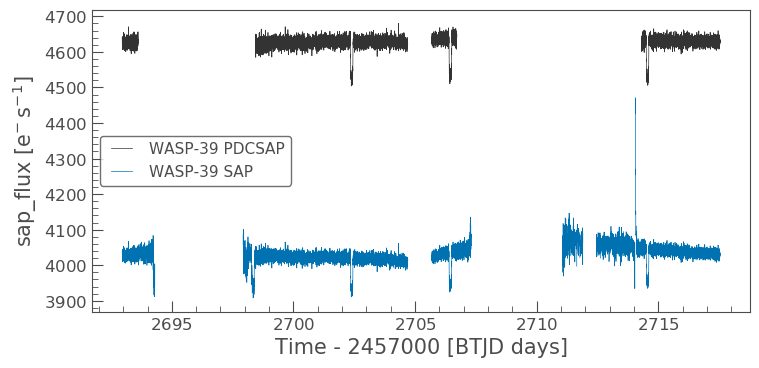

In [9]:
ax = lc_bad.plot(column='pdcsap_flux',label='WASP-39 PDCSAP')
lc_bad.plot(ax=ax,column='sap_flux', label="WASP-39 SAP")

We can see that the SAP flux contains more information than the PDCSAP, which has been refined to remove noise, scattered light, data with a larger than normal background, and instrumental effects. 

While the PDCSAP flux may be the best to derive the transit, the SAP data is still very useful and can be reduced further to provide a more complete light curve of the system. 

For now let us use the PDCSAP light curve to obtain the period of the system.

## 3. Find the transiting planet via a box least squares periodogram analysis.

The most common method used to identify transiting exoplanets is the Box Least Squares (BLS) periodogram analysis. BLS works by modeling a transit using an upside-down top hat with four parameters: period, duration, depth, and reference time. (Please see the [Identifying transiting exoplanet signals in a light curve tutorial](https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-identifying-transiting-planet-signals.html) for more information on BLS and finding exoplanets with *Lightkurve*)

To analyze the light curve via the BLS method you must pass the data to the [`to_periodogram`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.to_periodogram.html?highlight=to_periodogram) function and specify `bls` as the method. 

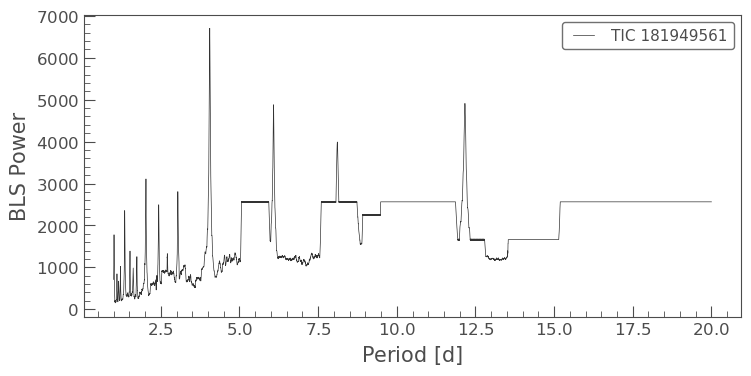

In [10]:
period = np.linspace(1, 20, 10000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

The above plot indicates the power, or the likelihood of the BLS fit, for each of the periods in lightcurve data. 
There are several spikes in the plot at specific periods, but the highest power spike shows the most likely period, the remaining lower power spikes are fractional harmonics of the period.

We can pull out the most likely BLS parameters by taking their values at maximum power as shown below.

In [11]:
WASP39_b_period = bls.period_at_max_power
WASP39_b_t0 = bls.transit_time_at_max_power
WASP39_b_dur = bls.duration_at_max_power

WASP39_b_period

<Quantity 4.05550555 d>

In [12]:
print(WASP39_b_period,WASP39_b_t0,WASP39_b_dur)

4.055505550555056 d 2694.284183711143 0.1 d


We have now derived the period of the planet WASP39-b as ~4 days, which is consistent with that published.

To confirm that this period and transit time (epoch) correspond to a transit signal, we can phase-fold the light curve using these values and plot it.

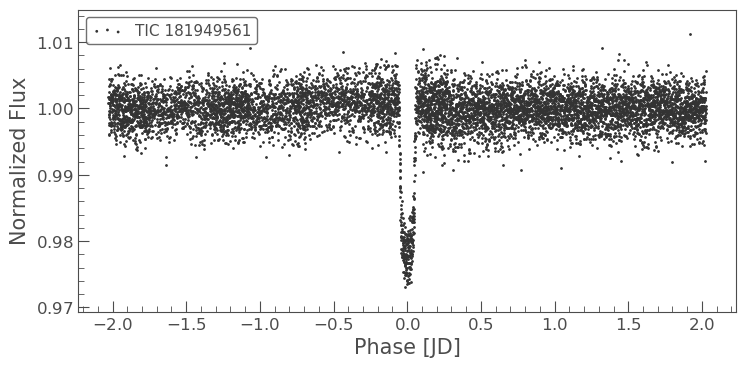

In [13]:
lc.fold(period=WASP39_b_period, epoch_time=WASP39_b_t0).normalize().scatter()

Wonderful we have now plotted our transit!

## 4. Obtaining a light curve from the TPF and reducing the data

As we saw in the SAP light curve, there is some data which was removed by the PDCSAP pipeline due to the poor quality of the data. 

Can we obtain the light curve of our object from the TPF and reduced the data ourselves, improving some of these previously discarded data points? The answer is yes!

A copy of a more refined light curve can be found [here](https://github.com/rebekah9969/JWST-Sprint/blob/main/Downloads/WASP-39b_TESS_Sector51_CorrectedLC.fits).

If you would like to learn how this light curve file was created, please continue with the tutorial. 

### 4.1 Creating a bitmask

First, we must download our objects target pixel file (TPF) and remove data that we think would reduce the quality of our light curve. We can do this by specifing a bitmask mask. To learn more about the [`TESSQualityFlags`](https://docs.lightkurve.org/reference/api/lightkurve.TessQualityFlags.html?highlight=tessqualityflags#lightkurve.TessQualityFlags) and bitmasks please see the [STScI documentation](https://outerspace.stsci.edu/display/TESS/2.0+-+Data+Product+Overview). We define our bitmask below:

In [14]:
bitmask = (lk.utils.TessQualityFlags.SafeMode |
           lk.utils.TessQualityFlags.CoarsePoint |
           lk.utils.TessQualityFlags.ManualExclude  |
           lk.utils.TessQualityFlags.Argabrightening | 
           lk.utils.TessQualityFlags.CollateralCosmic)

### 4.2 Downloading the TPF and applying our bitmask

In [15]:
tpf = search_tpf[0].download(quality_bitmask=bitmask)

We can now plot this and see what our object looks like. We can also over plot the aperture used by the SPOC to create the previously examined light curves. We do this using the `aperture_mask` parameter and the [`.pipeline_mask`](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.pipeline_mask.html?highlight=pipeline_mask#lightkurve.KeplerTargetPixelFile.pipeline_mask) function.

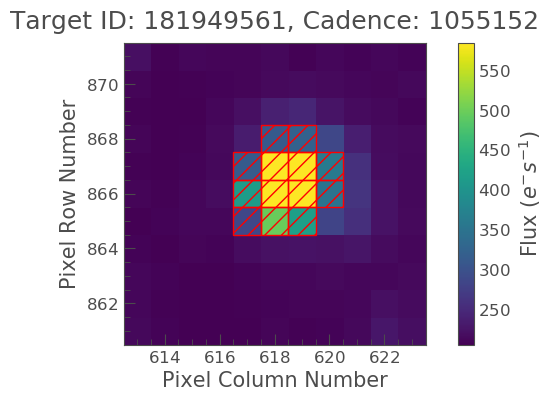

In [16]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

The TPF we are viewing is an official SPOC TPF, this means that the background estimates should be close to zero because these products have already been background-subtracted by the pipeline (i.e., the values in the FLUX_BKG column of the TPF have been subtracted from the values in FLUX). Background subtraction is often imperfect however, especially in this instance and as such you may want to view what the flux looks like and then re-estimate it.

## 4.2 Understanding the background flux

We can visualize the current background flux using the [`estimate_background`](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.estimate_background.html?highlight=estimate_background) function, and specifying the "background" aperture, as shown below.

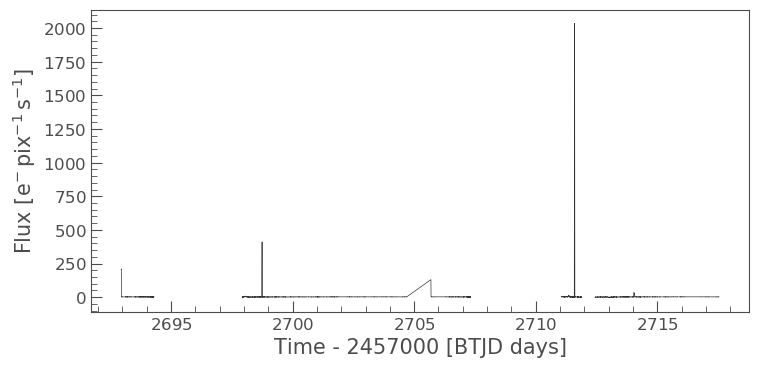

In [17]:
tpf.estimate_background(aperture_mask='background').plot()

There are several peaks in this light curve which illustrate the background issues we see in the data.

We now want to re-estimate the background model based only on pixels close to the target. This lets us make sure we remove any high spatial or temporal frequency noise from close to the target. We can do this via the following method.

1. Add the pipeline background flux back into the data.

In [18]:
tpf += np.nan_to_num(tpf.flux_bkg)

2. Identify pixels not close to the source in order to create a new background aperture from which a background model can be derived.

In [19]:
big_aperture = np.any(np.asarray(np.gradient(tpf.pipeline_mask.astype(float))) != 0, axis=0) & tpf.pipeline_mask

Lets compare our new background estimate to that from earlier 

3. Remove the median of this background model over time from the TPF flux.

In [20]:
tpf -= np.nanmedian(tpf.flux[:, ~big_aperture], axis=1)[:, None, None]

Great we now have a new TPF file which has a better background removal! Let's see what this looks like.

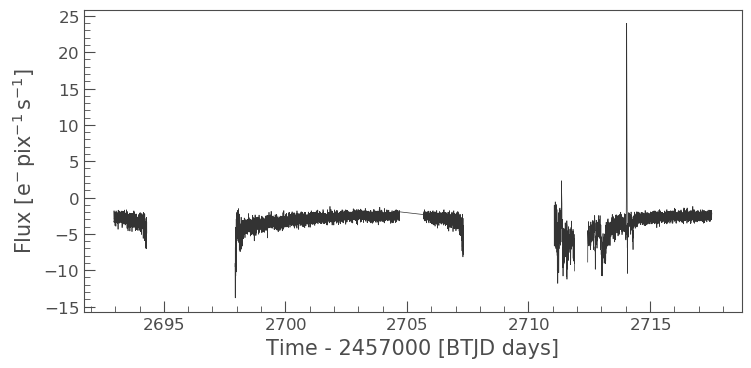

In [21]:
tpf.estimate_background(aperture_mask='background').plot()

Wonderful! This is a significant improvement from earlier. Next, we want to pull out the light curve for our object from this new and improved TPF. We do this using the [`to_lightcurve`](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.to_lightcurve.html?highlight=to_lightcurve#lightkurve.KeplerTargetPixelFile.to_lightcurve) function.

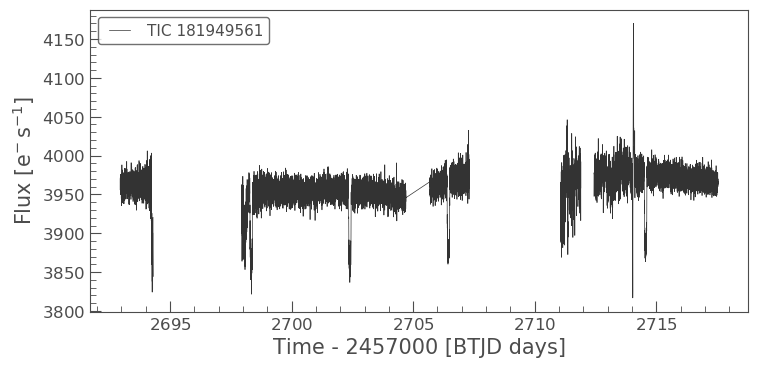

In [22]:
lc_tpf = tpf.to_lightcurve()
lc_tpf.plot()

## 4.3 Refining our transit parameters

This light curve is still a little noisy and has some trends we don't believe, we will remove these later in the tutorial using our knowledge of the systematics. 

First, however we can improve our period, transit time and duration estimates using a the BLS method from before but refining our parameter inputs using those obtained from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/overview/WASP%2039).

In [23]:
period, t0 = 4.0552941, 2455342.96913 - 2457000

We can then apply the BLS via the method and fold the light curve to show the transit as demonstrated earlier in part 3 of this tutorial.

In [24]:
bls_refined = lc_tpf.normalize().to_periodogram('bls', minimum_period=period*0.99, maximum_period=period*1.01, 
                                         duration=np.linspace(0.01, 0.1, 20), frequency_factor=1)
period, t0, dur = bls_refined.period_at_max_power.value, bls_refined.transit_time_at_max_power.value, bls_refined.duration_at_max_power.value,

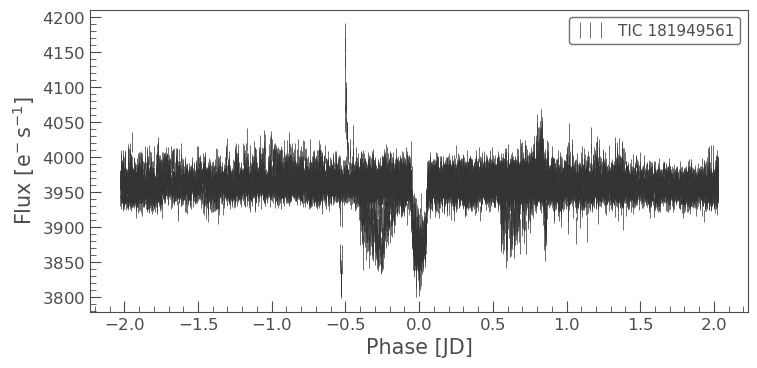

In [25]:
lc_tpf.fold(period, t0).errorbar()

## 4.4 Removing noise from our TPF light curve

As we can see there is still quite a bit of noise remining in the light curve and further reduction is required. 

For this tutorial we will correct our light curve using the following: 

1. The top three long time scale Cotrending Basis Vectors (CBVs) from the TESS mission
2. The top three medium time scale CBVs from the TESS mission
3. The top two Principal Components (PCs) of the pixels close to the source
4. A simple polynomial in time.

You can learn about the details of CBV application and linear regression via the applicaton of design matrices via the following *Lightkurve* tutorials: 

- [Removing noise from Kepler, K2, and TESS light curves using Cotrending Basis Vectors (CBVCorrector)](https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-3-how-to-use-cbvcorrector.html)
- [Removing scattered light from TESS light curves using linear regression (RegressionCorrector)](https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-3-removing-scattered-light-using-regressioncorrector.html)

First, we must obtain our CBVs from the mission.

In [26]:
from lightkurve.correctors import CBVCorrector
cbvc = CBVCorrector(lc_tpf)

These CBVs are associated with the CCD this target is on and for Sector 51. We can examine this object as follows:

In [27]:
cbvc.cbvs

[TESS CBVs, Sector.Camera.CCD : 51.1.3, CBVType : SingleScale, nCBVS : 16,
 TESS CBVs, Sector.Camera.CCD : 51.1.3, CBVType.Band: MultiScale.1, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 51.1.3, CBVType.Band: MultiScale.2, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 51.1.3, CBVType.Band: MultiScale.3, nCBVs : 1,
 TESS CBVs, Sector.Camera.CCD : 51.1.3, CBVType : Spike, nCBVS : 8]

We see that there are a total of 5 sets of CBVs, all associated with TESS Sector 51, Camera 1 and CCD 3. The number of CBVs per type is also given. We want only the top thre as the first several CBVs contain most of the systematics. The latter CBVs pose a greater risk of injecting more noise than helping. We can specify our choices and apply these via the following code. 

In [28]:
ncbvs = 3

multiscale1 = cbvc.cbvs[1].interpolate(lc_tpf).to_pandas()
multiscale2 = cbvc.cbvs[2].interpolate(lc_tpf).to_pandas()
cbvs = np.hstack([np.asarray(multiscale1[multiscale1.columns[2:2+ncbvs]]),
                 np.asarray(multiscale2[multiscale2.columns[2:2+ncbvs]])])

Extrapolation of CBVs appears to be necessary. Extrapolated values will be filled with zeros. Recommend setting extrapolate=True
Some interpolated (or extrapolated) CBV values have been set to zero
Extrapolation of CBVs appears to be necessary. Extrapolated values will be filled with zeros. Recommend setting extrapolate=True
Some interpolated (or extrapolated) CBV values have been set to zero


Below we plot the CBVs

Text(0.5, 0, 'Time [BTJD]')

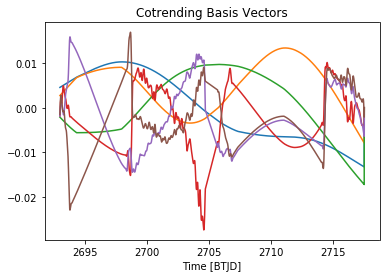

In [29]:
plt.plot(lc_tpf.time.value, cbvs);
plt.title("Cotrending Basis Vectors")
plt.xlabel("Time [BTJD]")

Next, we want to create our design matrix. Lightkurve provides a convenient [`DesignMatrix`](https://docs.lightkurve.org/reference/api/lightkurve.correctors.DesignMatrix.html?highlight=designmatrix) class which is designed to help you work with detrending vectors.

We want to look at cadences in our data where there is non NaN flux inside our aperture, and we want to specify the aperture from which we derive our trends. This aperture should be outside of our object aperture. We then want to specify the number of principal components in this matrix which we can do via the specification of `pca()`. 

The following code implements this process:

In [30]:
k = np.isfinite(lc_tpf.flux) & np.isfinite(lc_tpf.flux_err)

dm1 = lk.DesignMatrix(np.nan_to_num(tpf.flux[k][:, ~big_aperture]), name='bkg').pca(2)

Next, we want to create a matrix which contains our CBVs.

In [31]:
dm2 = lk.DesignMatrix(cbvs[k], name='cbvs').split(list(np.where(np.diff(lc_tpf[k].cadenceno) > 100)[0] + 1))

Finally, we want to create a matrix that will contain a polynomial in time.

In [32]:
dm3 = lk.DesignMatrix(np.vstack([tpf.time.value[k] ** idx for idx in range(3)]).T, name='poly')

We then combine these to form our final matrix to be applied.

In [33]:
dm = lk.DesignMatrixCollection([dm1, dm2, dm3])

Before we apply this matrix however, we must first mask our light curve for the transits. This will ensure that we do not overfit during these times. 

In [34]:
ph = (lc_tpf[k].time.value - t0) % period
ph[ph > period/2] -= period

mask = np.abs(ph) > dur * 1.5

mask &= np.abs(ph) < (period/2 - dur * 1.5)

Finally, let us correct our light curve using our design matrix.

In [35]:
r = lk.RegressionCorrector(lc_tpf[k].normalize())
clc = r.correct(dm, cadence_mask=mask)

We can now assess the quality of our fit using the `diagnose` function

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd619eb60d0>,
      dtype=object)

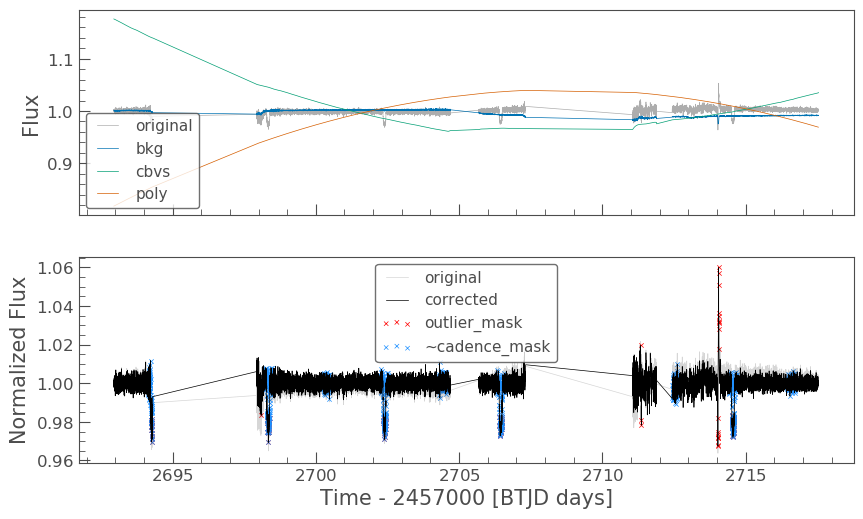

In [36]:
r.diagnose()

In these plost we can see each correction applied and the overall alteration on the initial light curve. We also note the outliers marked in red on the bottom plot, and the masked transits in blue. 

Let us now compare to our earlier uncorrected light curve. 

(-0.3, 0.3)

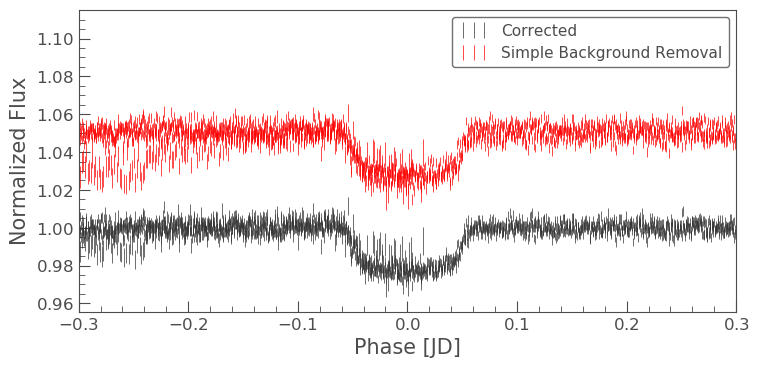

In [37]:
ax = clc[clc.flux > 0.9].fold(period, t0).errorbar(ls='', label='Corrected', lw=0.5)
(lc_tpf.normalize()[lc_tpf.normalize().flux > 0.9].fold(period, t0) + 0.05).errorbar(ax=ax, c='r', ls='', label='Simple Background Removal', lw=0.5)
plt.xlim(-0.3, 0.3)

Our final light curve has a slight improvement in the noise properties after our correction.

We can now write out our final corrected light curve

In [38]:
clc.to_fits('WASP-39b_TESS_Sector51_CorrectedLC.fits', overwrite=True)